# TopoGAN: генеративно-состязательная сеть с учетом топологии

## Основные определения

**GAN - генеративные-состязательные сети** - алгоритм машинного обучения без учителя, построенный на комбинации из двух нейронных сетей,
одна из которых генератор (G) синтезирует изображения, похожие на реальные, 
а вторая дискриминатор (D) - отличает эти поддельные изображения от настоящих. 

Посредством минимаксной игры генератор сходится к сети, которая генерирует искусственные изображения, отобранные из распределения, которое соответствует распределению реальных изображений.

**Топология** — раздел математики, изучающий:

-	в самом общем виде — явление непрерывности;

- в частности — свойства пространств, которые остаются неизменными при непрерывных деформациях. Например, связность, ориентируемость, компактность.

# Введение

Существующие GAN сосредоточены на создании реалистичных изображений на основе характеристик изображений, полученных с помощью CNN, но не могут сохранить структурные свойства реальных изображений.

В этой статье рассматривается новая модель GAN, которая изучает топологию реальных изображений. Вводится новая функция потерь, оптимизируя которую генератор создает изображения с той же структурной топологией, что и реальные изображения.

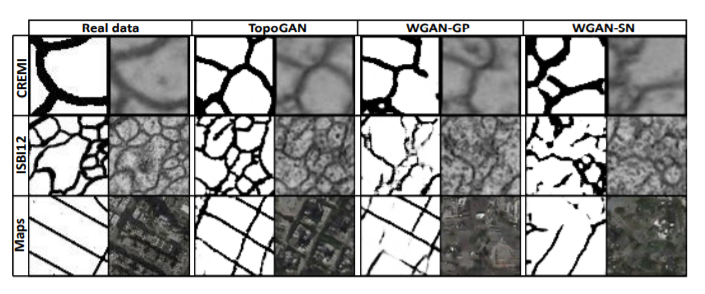
**Рис. 1.**  Примеры изображений структур с богатой топологией:
мембраны нейронов (CREMI и ISBI12) и дорожные сети со спутниковых снимков (Google Maps). 
Слева направо: реальные изображения, изображения, синтезированные TopoGAN, WGAN-GP и WGAN-SN.
Каждая реальная/искусственная маска сочетается с текстурированным изображением. 

**TopoGAN** - первая модель GAN, которая изучает топологию на реальных данных. Топология напрямую измеряет структурную сложность, такую как количество соединенных компонентов и отверстий. Традиционный дискриминатор GAN различает искусственные и реальные изображения с точки зрения характеристик, но не зависит от топологического несходства. Таким образом, генератор не может узнать топологию реального изображения. На рис. 1 структуры, синтезированные обычными сетями GAN (WGAN-GP и WGAN-SN), имеют тенденцию к разрыву и разъединению. 

TopoGAN фокусируется на создании двоичных изображений (масок), очерчивающих лежащие в основе структуры. Для искусственных изображений текстура добавляется отдельно обученной сетью pix2pix.

**Три основные части, рассмотренные в статье:**
- Предлагается топологическая функция потерь GAN (topological GAN loss), которая измеряет расстояние между искусственным и реальным распределениями изображений в пространстве топологических характеристик
- Показывается, что эта потеря дифференцируема
- Предлагаются новые меры с учетом топологии для оценки производительности генератора в пространстве топологических функций


# Cопутствующие работы

Генеративные состязательные сети (GAN) очень популярны для моделирования распределений данных. Однако обучение GAN очень нестабильно. WGAN, WGAN-GP, WGAN-TS, WGAN-QC и другие используют расстояние Вассерштейна для обучения GAN. Различные стратегии градиентных штрафов могут эффективно стабилизировать обучение GAN, также широко используется спектральная нормализация (SN). 

# Топологическая информация для анализа изображений. 
Существует множество методов для прямого использования постоянной гомологии в качестве механизма извлечения признаков.
Извлеченный топологический признак может быть векторизован и использован в качестве входных данных для глубоких нейронных сетей. Для полностью контролируемых задач сегментации изображений топологическая информация явно использовалась как ограничение для улучшения качества сегментации. В различных генеративных моделях используются оценки, которые не позволяют реально оценить, изучил ли генератор реальную топологию изображения. TopoGAN - первая генеративная модель, которая автоматически изучает топологические свойства реальных изображений.


## Метод
TopoGAN соответствует распределению искусственных и реальных изображений как по характеристикам изображения, так и по характеристикам топологии. Для этого, в дополнение к обычным потерям дискриминатора и генератора, вводится новый член потерь для генератора, $L_{topo} (P_{data}, G)$. Этот член потерь, называемый топологическими потерями GAN, измеряет, насколько близки изображения, генерируемые G, к реальным изображениям с точки зрения топологии. Сведение к минимуму приводит к тому, что синтетические изображения имеют топологию, аналогичную реальным изображениям. Потери дискриминатора (D) показаны в формуле (1). Потери генератора (уравнение (2)) представляет собой сумму потерь обычного генератора и новых потерь. Формально мы имеем:
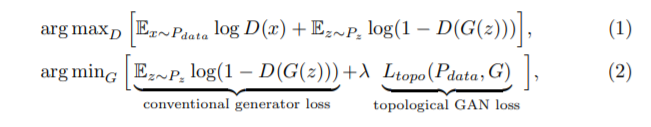
где λ контролирует вес топологической функции потерь GAN.

Основной фокус на создании бинарных изображений - масок, очерчивающих структуры, такие как сосуды, нейронные мембраны, дорожные сети и т.д. Генератор выводит полутоновое изображение с реальным значением в качестве искусственной маски. Дискриминатор обрабатывает входное изображение (реальное или искусственное) как полутоновое изображение с действительным знаком в диапазоне от 0 до 1. После синтеза маски отдельно обученная сеть pix2pix заполняет текстуры на основе каждой маски.

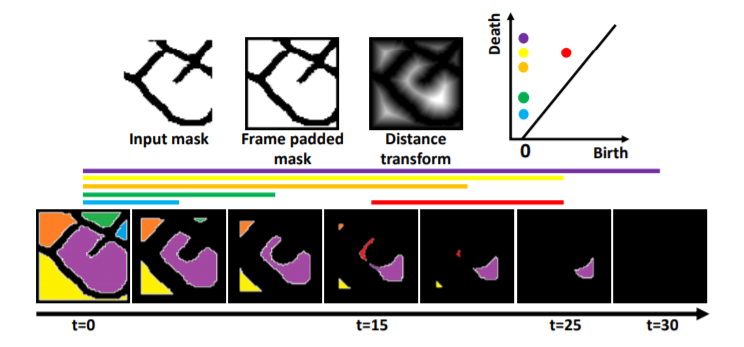
**Рис.2** 
Иллюстрация стойкой гомологии. Верхний ряд слева направо: маска ввода (из набора данных CREMI - мембраны нейрона), дополненная рамкой (так, чтобы все ветви образовывали отверстия), преобразование расстояния и диаграмма устойчивости вывода. Нижний ряд: последовательность наборов подуровней с разными пороговыми значениями. Рождаются и заполняются разные дыры. Все исходные дыры рождаются в момент времени t = 0. Почти дырка (красная область, красная полоса, красная точка) рождается позже (t = 15).


# Постоянные гомологии: от изображений к топологическим элементам

Для топологического пространства $ y ⊆ R^2 $ дыры и компоненты связности являются его 1-мерными и 0-мерными топологическими структурами соответственно. Количество отверстий - это число Бетти, $β_y$.

На рис.2 мы наблюдаем 5 лунок (число Бетти $β_y$ = 5), и число Бетти может охватить только целые отверстия. Ответвление в середине изображения почти создает новую дыру. Но эта почти дыра не улавливается числом Бетти. Чтобы эффективно учитывать эти почти дыры в вычислениях, используются преобразование расстояния и теория постоянных гомологий.

**Рассмотрим преобразование расстояния:**

*Определение 1.* Преобразование расстояния (DT) генерирует карту D для каждого пикселя p двоичного изображения I: $$ D (p) = min_{ q∈Ω} (|| p - q || | I (q) = 0),$$ где Ω - область изображения.


Вместо того, чтобы смотреть только на исходную функцию, применяется преобразование расстояния к маске и получается неотрицательная скалярная функция, определенная для всей области изображения, $f_y: Ω → R +$. Множество подуровней $f_y$ определяется как область, ограниченная определенным порогом t, формально, $Ω^t_{f_y} = {x ∈ Ω | f_y (x) ≤ t}$. Для определенных пороговых значений почти отверстие становится полным отверстием. Последовательность всевозможных наборов подуровней, формально называемых фильтрацией, индуцированной $f_y$, по сути, отражает процесс роста исходной маски.

Стойкие гомологии охватывают всю фильтрацию и исследуют ее топологические структуры (дыры, компоненты связности и топологические структуры более высоких измерений). Каждая топологическая структура живет в интервале пороговых значений. 

На рис.2 пять исходных отверстий рождаются при t = 0 и заполняются в разное время, когда они заполняются растущей маской. Почти дыра (красная) рождается в момент t = 15, когда фиолетовая дыра разделяется на две части. Он умирает при t = 25. Все отверстия (продолжительности жизней показаны в виде горизонтальных полос) записываются в виде двухмерного набора точек, называемого диаграммой устойчивости. Время рождения и время смерти каждой дыры становятся двумя координатами соответствующей ей точки. На этой диаграмме у нас есть 5 точек с рождением = 0 и красная точка с ненулевым временем рождения для почти дыры.

## Расстояние между диаграммами и топологическая функция потерь GAN

Используя преобразование расстояний и постоянную гомологию, каждое входное двоичное изображение $y$ преобразуется в соответствующую ему диаграмму устойчивости, $ dgm(f_y)$, называемую топологической особенностью $y$. Сначала введем расстояние между любыми двумя диаграммами устойчивости, которое измеряет топологическое несходство между двумя изображениями. Затем определим наши топологические потери GAN как расстояние между двумя наборами диаграмм, вычисленное из искусственных масок и реальных масок соответственно. Иллюстрацию топологических потерь GAN можно найти на рис.3.

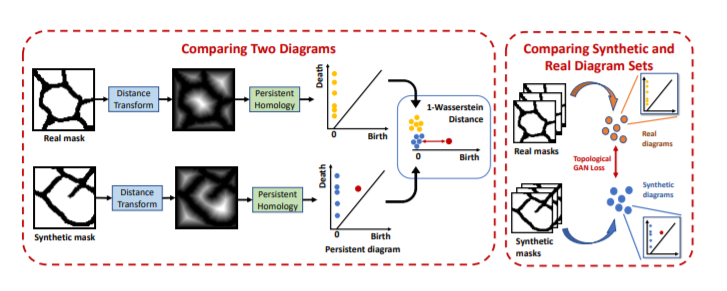
**Рис. 3.** Компонент обработки топологии. На входе набор настоящих масок и искусственных масок. Каждая маска проходит преобразование расстояния и вычисление постоянной гомологии. Получаем диаграмму устойчивости, набор 2D точек. Сравниваются две диаграммы, используя расстояние 1-Вассерштейна только по времени рождения. Потеря(loss) определяется как расстояние между двумя наборами диаграмм.

Формально мы проецируем все точки двух диаграмм на ось рождения и вычисляем их расстояние 1-Вассерштейна, т. е. оптимальное согласованное расстояние между двумя наборами точек в пределах оси рождения, как показано на рис. 3. Мы отмечаем, что точки на диаграммах искусственного и реального изображений в основном сопряжены с близлежащими точками. Единственное исключение - красная точка, соответствующая почти лунке.

Расстояние на диаграмме показывает, насколько легко исправить искусственное изображение, чтобы оно имело такое же количество отверстий, как и реальное. Расстояние между двумя диаграммами $dgm_1 и dgm_2:$
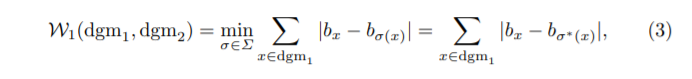
в котором Σ - это множество всех возможных взаимно однозначных соответствий между двумя диаграммами, а $σ^*$ - оптимальное соответствие, которое можно выбрать. Здесь $b_x$ обозначает время рождения точки x в $dgm_1$. Аналогично, $b_{σ(x)}$  и  $b_{σ^∗(x)}$ - время рождения совпадения $σ (x)$ и оптимального совпадения $σ^∗ (x)$ в $dgm_2$. Соответствие может не существовать, если на двух диаграммах разное количество точек.
С этой целью мы можем добавить бесконечное количество точек к диагональной линии (b = d), чтобы несовпадающие точки можно было сопоставить с диагональной линией.


## Топологические функции потерь GAN определяются с помощью соответствующих диаграмм устойчивости

Функция потерь, которая измеряет разницу между двумя диаграммами распределениями должны быть 
- простыми для вычисления;  
- эффективными в согласовании двух распределений.

Находим парное совпадение между искусственной и реальной диаграммами и суммируем расстояние диаграммы между всеми согласованными парами. Пусть $D_{syn}$ и $D_{real}$ будут двумя наборами диаграмм устойчивости, созданными из искусственных и реальных изображений. Предположим, что у нас есть оптимальное соответствие между двумя наборами диаграмм, $ π^∗$. Тогда функция потерь - это общее расстояние между всеми согласованными парами искуственных и реальных диаграмм. Напомним, $W_1$ - это расстояние на диаграмме (уравнение (3)). Имеем (4):
            $$ L_{topo} =\sum_{dgm_i ∈ D_syn} W_1 (dgm_i, π^∗((dgm_i)) $$

Чтобы найти оптимальное соответствие $π^∗$ между наборами диаграмм, мы используем метод оптимального переноса. Обозначим $dgm^s_i ∈ D_{syn}$ и $dgm^r_j ∈ D_{real}$. Пусть $n_{syn}$ и $n_{real}$ будут размером $D_{syn}$ и $D_{real}$. Решаем прямую задачу Монжа-Канторовича, чтобы найти оптимальный транспортный план (5):
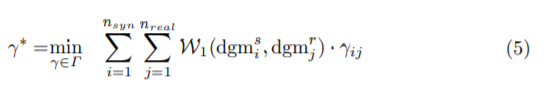
где Γ = {$γ ∈ R^{n_{syn} × n_{real}}_+ | γ1_{n_{real}} = 1 / n_{syn} · 1_{n_{syn}}, γ^T1_{n_{syn}} = 1 / {n_{real}} ·1 _{n_{real}}$}. $1_n$ - n-мерный вектор всех единиц. Обозначим через $γ ^∗$ - оптимальное решение уравнения (5). Мы вычисляем оптимальное соответствие ($π^∗$), отображая i-ю $dgm^s_i$ на наилучшую согласованную реальную диаграмму относительно оптимального план перевозки, т.е. $dgm^r_{h(i)}$ такой, что $h(i) = arg  max_j γ^∗_{ij}.$  Формально $π^∗(dgm^s_i) = dgm^r_{h (i)}$.

## Градиент

Получим градиент функции топологических потерь GAN (уравнение (4)). Функцию потерь можно разложить на сумму членов для отдельных искусственных диаграмм, $L_{topo} = \sum_{i} L^i_{topo}$, в которых i-й член потерь $L^i_{topo}= W_1 (dgm_i, π^∗((dgm_i))$. Здесь i-я искусственная диаграмма генерируется из преобразования расстояния i-й искусственной маски, $y_i, dgm_i = dgm (f_{yi})$. Между тем, $y_i$ - это двоичная маска, вычисляемая путем определения порога сгенерированного изображения $G (z_i)$. Достаточно вычислить градиент $L^i_{topo}$ с учетом генератора G. 

Перед выводом градиента проиллюстрируем градиентный спуск на рис. 4. Для конкретного искусственного изображения покажем, как маска изменяется на разных итерациях и как соответствующим образом изменяется диаграмма устойчивости. По мере продолжения градиентного спуска почти-дыра в искусственном изображении медленно закрывается, чтобы сформировать полную дыру. На каждой итерации маска $y$ растет к седловой точке $s$ преобразования расстояния $f$. Значение функции преобразования расстояния в седле $s, f (s)$, уменьшается до нуля. На диаграмме устойчивости соответствующая точка $x$ перемещается влево, поскольку время ее рождения $b_x = f (s)$ уменьшается. Это уменьшает расстояние 1-Вассерштейна между искусственной диаграммой и соответствующей реальной диаграммой.
Формально, по цепному правилу, $$ \frac{∂ L^i_{topo}}{∂G} = \frac{∂ L^i_{topo}}{∂dgm_i}* \frac{∂dgm_i}{∂f_{yi}}*\frac{∂f_{yi}}{∂G(z_i)}* \frac{∂G(z_i)}{∂G}$$ Далее мы вычисляем каждый из множителей.


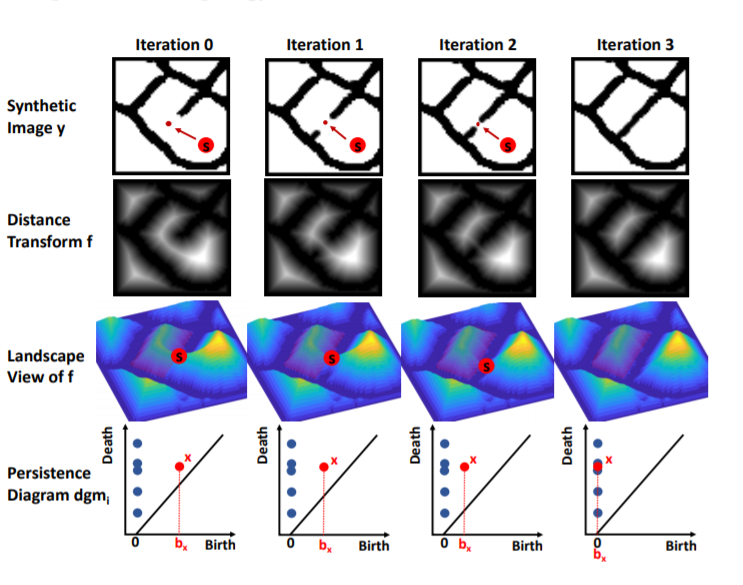
**Рис. 4** Сверху вниз: одно и то же искусственное изображение, зафиксированное на разных итерациях, преобразования расстояния, ландшафтные виды преобразований расстояний и диаграммы устойчивости. Красный маркер s - это седловая точка, значение функции которой - время рождения почти дырки x.

### Производная функции потерь относительно диаграммы устойчивости

Используя формулы (3) и (4), можно переписать i-й член потерь как 
$$ L^i_{topo} =\sum_{x∈dgm_i} |b_x − b_{σ^∗(x)}| = \sum_{x∈dgm_i} sign(b_x − b_{σ^∗(x)})(b_x − b_{σ^∗(x)})$$
Уравнение зависит от двух оптимальных согласований, $π^∗$ и $σ^∗$. Первый, $π^∗: D_{syn} → D_{real}$, вычисляется путем оптимизации транспортной задачи между двумя наборами диаграмм, $D_{syn} и  D_{real}$. Второе оптимальное согласование, $σ^∗: dgm_i → π^∗(dgm_i)$, вычисляется с помощью одномерной транспортной задачи между точками двух согласованных диаграмм. Без ограничения общности, мы предполагаем, что для всех $x ∈ dgm_i$ и $x' ∈ π^∗(dgm_i)$ их разности времени рождения $(b_x - b_{x'})$ являются различными ненулевыми значениями.

В то время как оптимальный транспортный план ($γ^∗$ в уравнении (5)) непрерывно изменяется по мере изменения входных искусственных диаграмм, согласования $π^∗$ и $σ^∗$ меняются только в сингулярностях (множество с нулевой мерой). В небольшой окрестности входа мы можем предполагать постоянство оптимальных отображений $π^∗$ и $σ^∗$, а также постоянство знака $(b_x − b_{σ^∗(x)})$ и $b_{σ^∗(x)}$. Формально градиент можно записать как частную производную
потери с учетом времени рождения и смерти каждой точки $x ∈ dgm_i$:
$$ \frac{∂ L^i_{topo}}{∂b_x}= sign(b_x − b_{σ^∗(x)}), \frac{∂ L^i_{topo}}{∂d_x} = 0$$
Отрицательное направление градиента - $\frac{∂ L^i_{topo}}{∂dgm_i} \frac{∂dgm_i}{∂G}$ перемещает каждую точку $x$ на искусственной диаграмме $dgm_i$ к соответствующей точке на соответствующей реальной диаграмме, $σ^∗ (x)$, по горизонтали (но не по вертикали). См. Рисунок 4 для иллюстрации.


### Производная диаграммы устойчивости относительно преобразования расстояния

Производная функции потерь относительно времени смерти равно нулю. Следовательно, нам нужно позаботиться только о производной времени рождения $b_x$ относительно преобразования расстояния $f_{y_i}, \frac{∂b_x}{∂f_{yi}}$.

Важным наблюдением является то, что время рождения любой почти дырки при фильтрации - это значение функции седловой точки $f_{y_i}$, находящейся прямо в середине зазора, обозначенной как $s_x$. Формально $b_x = <δ_{s_x},f_{y_i}>$, где $δ_{s_x}$, - дельта-функция Дирака в седловой точке $s_x$. Взяв градиент, имеем $ \frac{∂b_x}{∂f_{yi}} = δ_{s_x}$.

$ - \frac{∂ L^i_{topo}}{∂b_x} \frac{∂b_x}{∂f_{yi}} \frac{∂f_{y_x}}{∂G}$ - отрицательный градиент относительно $b_x$ диаграммы перемещает значение функции седловой точки $b_x = f_{y_i} (s_x)$ вверх или вниз так, чтобы оно приближалось к времени рождения согласованной реальной точки диаграммы, $b_{σ^ ∗ (x)}$. См. Рис.4.

### Производная преобразования расстояния относительно искусственного изображения $G (z_i)$.

Наконец, вычисляем производную $f_{y_i}$ относительно i-го искусственного изображения $G (z_i)$. Фокусируясь на седловой точке $s_x$, для увеличения или уменьшения ее преобразования расстояния $f_{y_i} (s_x)$ градиент должен увеличивать маску $y_i$ в ближайшей к $s_x$ граничной точке, называемой r. Это достигается путем изменения значений искусственного изображения нескольких пикселей рядом с r. Как видно на рис. 4, по мере продвижения маска растет к седловой точке. 

# Метрики с учетом топологии для оценки GAN

Обычно качество генератора оценивается путем сравнения распределений искусственных и реальных изображений в пространстве характеристик изображения на основе CNN. В этой статье предлагаются метрики, которые напрямую измеряют топологическую разницу между искусственными и реальным распределениями изображений. Первый показатель, называемый оценкой Бетти, напрямую основан на топологии маски, измеряемой числом Бетти. Оценка Бетти вычисляет гистограмму для всех искусственных масок и другую гистограмму для всех реальных масок. Затем он сравнивает две гистограммы, используя их расстояние $χ^2$. Определение можно легко распространить на нульмерную топологию, т. е. подсчет количества связанных компонент.

Вторая оценка основана на диаграммах устойчивости, которые учитывают как дыры, так и почти дыры. Используется метод встраивания в среднее ядро (the kernel mean embedding). В качестве некоторого заданного ядра для диаграмм устойчивости мы можем определить неявную функцию $Φ$, отображающую все искусственные/реальные диаграммы устойчивости в гильбертово пространство $H$. В таком пространстве становится легко вычислить среднее значение каждого набора диаграмм,
$$ Ф (D_{syn}): = \frac{1}{n_{syn}}  * \sum_{i=1}^{n_{syn}} Ф(dgm^s_i) $$ Мы измеряем разницу между наборами искусственных и реальных диаграмм, используя максимальное среднее расхождение (MMD), $$ MMD (D_{syn}, D_{real}): = || Φ (D_{syn}) - Φ (D_{real})||$$

Было доказано, что MMD на основе выборки будет сходиться к своему непрерывному аналогу. Предлагается использовать несмещенную MMD. Что касается ядра для диаграмм устойчивости, существует множество вариантов. Здесь используется гауссово ядро, основанное на расстоянии 1-Вассерштейна между диаграммами, $k_{W_1} (dgm_i, dgm_j) = exp (\frac{−W_1 (dgm_i,dgm_j)}{ σ^2})$.
Будем оценивать TopoGAN, используя FID-начальная дистанция по Фреше, несмещенную оценку MMD и оценку Бетти.


# Эксперименты

Сравнивается TopoGAN с двумя базовыми GAN: Wasserstein GAN с градиентным штрафом (WGAN-GP) и Wasserstein GAN со спектральной нормализацией (WGAN-SN). Эти методы наиболее известны благодаря стабилизации обучения GAN и предотвращению коллапса режима. Чтобы продемонстрировать потенциал TopoGAN на практике, мы демонстрируем его в следующей задаче: сегментация.

*Наборы данных.* TopoGAN оценивается на пяти наборах данных: CREMI, ISBI12, Google Maps, CMP Facade Database и наборе данных Retina. Первые два представляют собой наборы данных сегментации изображений нейронов (произвольно выбираем 7500 и 1500 участков размером 64 × 64 соответственно из их масок сегментации). Карты Google (аэрофотоснимки ↔ карты) и база данных фасадов CMP (фасады ↔ метки) состоят из парных изображений RGB. RGB-изображения карт и надписей преобразуются в изображения в оттенках серого (4915 патчей размером 64 × 64 из преобразованных карт и изменяем размер всех 606 меток фасадов до 128 × 128). Набор данных Retina состоит из 98 сегментов сетчатки, которые мы собрали из 4 наборов данных: IOSTAR (40), DRIVE ( 20), STARE (20) и CHASE DB1 (28) (Все изображения сетчатки обрезаются и меняют размер до разрешения 128 × 128.)


**Количественные и качественные результаты.**

В Таблице 1 предствлены результаты о производительности TopoGAN и двух базовых уровнях относительно трех показателей: FID, несмещенная MMD (максимальное среднее расхождение) и оценка Бетти. TopoGAN значительно превосходит эти два базовых уровня по двум метрикам с учетом топологии. Превосходная производительность TopoGAN доказывает, что топологические потери GAN успешно обеспечили структурную / топологическую достоверность сгенерированных изображений, как и требовалось.

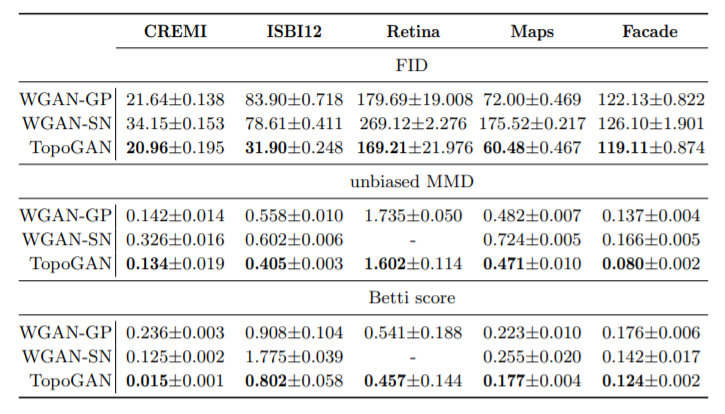
**Таблица 1.** Сравнения с базовыми GAN по FID, несмещенную MMD и оценке Бетти по пяти наборам данных. Стандартные отклонения основаны на 3 прогонах. Опускается оценка MMD и Бетти для WGAN-SN на Retina, поскольку WGAN-SN не дает разумных результатов.

Качественные результаты представлены на рис. 5. Для справедливого сравнения используется один и тот же набор входных шумов для генерации данных для каждого метода GAN. Видим, что маски, производимые TopoGAN, имеют более четкие границы и полные циклы. Они топологически больше похожи на реальные данные (т.е. имеют аналогичные числа Бетти). TopoGAN также показывает лучшую производительность в изображениях текстур. Напротив, базовые уровни WGAN-GP и WGAN-SN имеют тенденцию создавать нарушенные структуры. Набор данных Retina сложен для всех моделей GAN. Это связано с небольшим обучающим набором (98) и неоднородностью набора данных; его изображения взяты из нескольких наборов данных с разной геометрией, разрешением, соотношением сторон и контрастами.

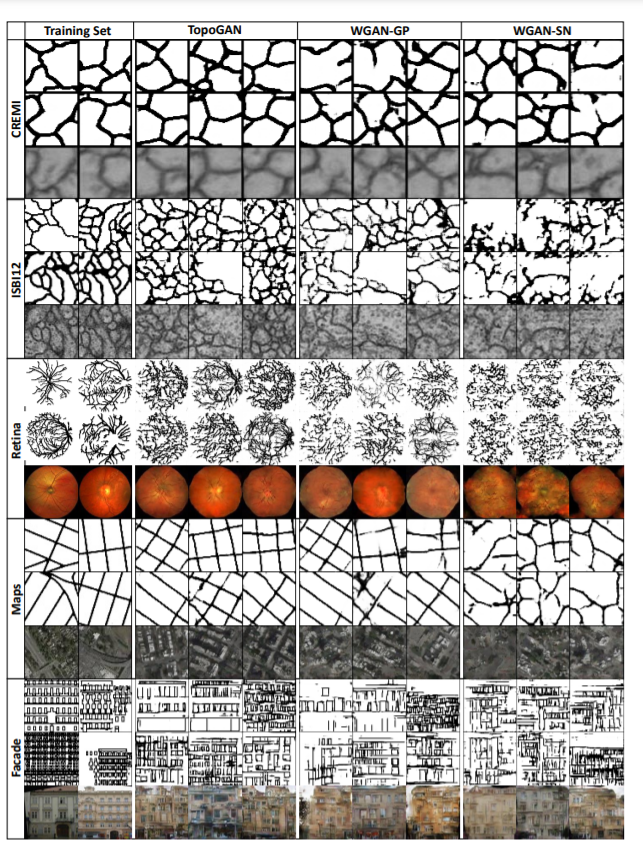
**Рис. 5** Качественные сравнения TopoGAN с WGAN-GP и WGAN-SN на 5 наборах данных. Слева направо: реальные маски из обучающего набора, сгенерированные маски из TopoGAN, WGAN-GP и WGAN-SN. Для каждого набора данных в третьей строке показаны изображения текстур, соответствующие маскам во второй строке.

### Применение сегментации. 
TopoGAN улучшает производительность в последующей задаче двоичной сегментации. Для каждого набора данных мы обучаем сеть сегментации с реальными обучающими данными, искусственными данными и реальными данными, дополненными искусственными данными. Сети, обученные с использованием искусственных данных из TopoGAN, сравниваются с сетями, обученными с данными из базовых GAN и с реальными данными обучения. Сети сегментации оцениваются на тестовых данных с тремя метриками сегментации: (1) точность пикселей, (2) Dice score и (3) Adapted Rand Index (ARI). Результаты Dice score в таблице 2.

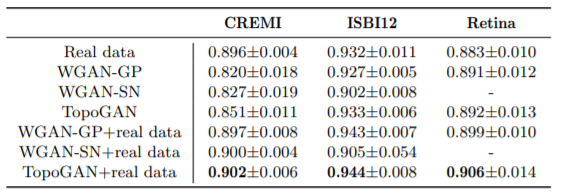
**Таблица 2.** Оценка сетей сегментации на реальных тестовых данных. Для каждого набора данных мы обучаем в общей сложности 21 сеть сегментации с использованием реальных обучающих данных, искусственных данных из TopoGAN и двух базовых показателей, а также реальных данных, дополненных искусственными данными. Мы сообщаем среднее значение и стандартное отклонение трехкратной перекрестной проверки.

Для создания искусственных пар (поддельные маски ↔ текстурированные маски) сеть pix2pix сначала обучается с использованием реальных пар данных. Обученная сеть pix2pix принимает в качестве входных данных маски, сгенерированные GAN, и создает текстурированные маски, на которых может быть обучена сеть сегментации. U-Net используется в качестве сети сегментации. Используется трехкратную перекрестную проверку и сообщается как среднее значение, так и стандартное отклонение Dice score для всех наборов данных. Обратите внимание, что сегментируются только CREMI, ISBI12 и Retina, поскольку два других набора данных не являются наборами данных сегментации. Результаты сегментации представлены в таблице 2. TopoGAN с чистыми синтетическими данными дает результаты, сопоставимые с сегментами сетей, обученных с использованием реальных данных на наборе данных ISBI12 и Retina. Сегментации, дополненные искусственными данными, всегда работают лучше, чем реальные или искусственные данные. Реальные данные TopoGAN плюс дают наилучшие результаты, за ними следует WGAN-GP плюс реальные данные.

# Заключение
В этой статье предлагается TopoGAN, первый метод GAN, явно изучающий топологию изображения на основе реальных данных. Были предложены топологическая функция потерь GAN и показано, что эта потеря дифференцируема и может быть легко включена в обучение GAN. Кроме того, предложены новые метрики для измерения топологических различий между синтезированными и реальными изображениями. Эмпирически мы показали, что TopoGAN генерирует изображения с лучшими топологическими характеристиками, чем современные GAN, как количественно, так и качественно.
